# English data


/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Accuracy: 0.7333
F1 Score (Micro): 0.7333
F1 Score (Macro): 0.5816
Confusion Matrix:
[[33  3  0]
 [10 21  2]
 [ 5  0  1]]


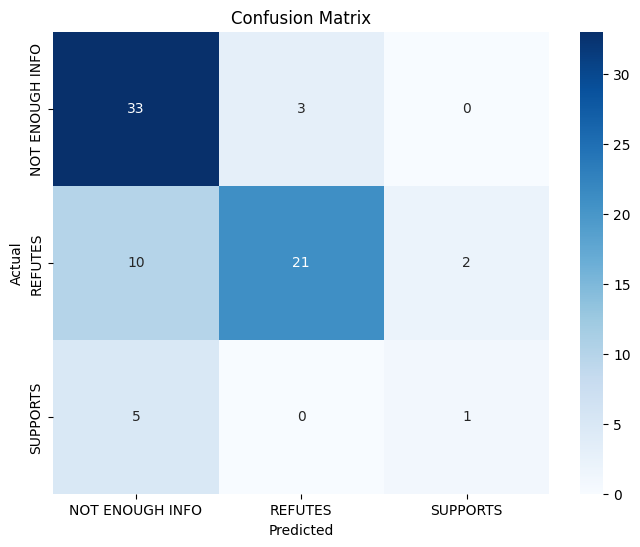

In [1]:
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from preparing.preprocessor import Preprocessor
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs ,prepare_dataset_for_classification
from  training.supervised_Models import build_random_forest_model
from evaluation.verification_evaluation import evaluate_model
from preparing.preprocessor import Preprocessor
from utils.data_split import load_and_combine_datasets, stratified_split
from utils.feature_extractor import FeatureExtractor 

train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

#Create rumor-evidence-label pairs
rumor_evidence_label_train = create_rumor_evidence_label_pairs(train_data)
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

#Prepare data for classification (rumor + evidence)
train_texts, train_labels = prepare_dataset_for_classification(rumor_evidence_label_train)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)


feature_extractor = FeatureExtractor(method='tfidf') 
train_features = feature_extractor.fit_transform(train_texts)
test_features = feature_extractor.transform(test_texts)


#Train Random_forest model
random_forest = build_random_forest_model(train_features, train_labels)

#Evaluate the model
evaluation_results = evaluate_model(random_forest, test_features, test_labels)

# Arabic data

Accuracy: 0.6912
F1 Score (Micro): 0.6912
F1 Score (Macro): 0.3839
Confusion Matrix:
[[43  1  0]
 [14  4  0]
 [ 6  0  0]]


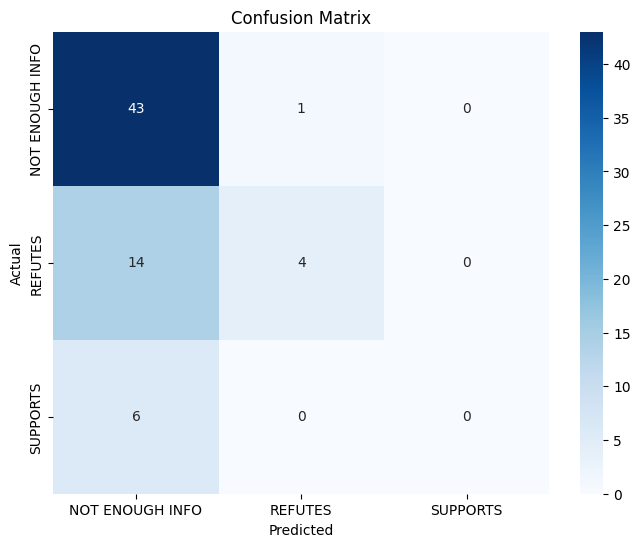

In [2]:
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from preparing.preprocessor import Preprocessor
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs ,prepare_dataset_for_classification
from  training.supervised_Models import build_random_forest_model
from evaluation.verification_evaluation import evaluate_model
from preparing.preprocessor import Preprocessor
from utils.data_split import load_and_combine_datasets, stratified_split
from utils.feature_extractor import FeatureExtractor 

train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

#Create rumor-evidence-label pairs
rumor_evidence_label_train = create_rumor_evidence_label_pairs(train_data)
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

#Prepare data for classification (rumor + evidence)
train_texts, train_labels = prepare_dataset_for_classification(rumor_evidence_label_train)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)

#Feature extraction 
feature_extractor = FeatureExtractor(method='tfidf') 
train_features = feature_extractor.fit_transform(train_texts)
test_features = feature_extractor.transform(test_texts)


#Train Random_forest model
random_forest = build_random_forest_model(train_features, train_labels)

#Evaluate the model
evaluation_results = evaluate_model(random_forest, test_features, test_labels)
